In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blood/ultima_all_clean.txt
/kaggle/input/all-crypto-currencies/crypto-markets.csv
/kaggle/input/titanic/titanic.txt


### 0. Pandas Data Frame & How to access it

In [2]:
import pandas as pd 
import numpy as np
array = np.array([[1,2,3],[4,5,6],[7,8,9]])
colnames = ['one','two','three']
rownames = ['a','b','c']
df = pd.DataFrame(array, index=rownames, columns=colnames)
df

,one,two,three
a,1,2,3
b,4,5,6
c,7,8,9


In [3]:
df['one']

a    1
b    4
c    7
Name: one, dtype: int64

In [4]:
df.one

a    1
b    4
c    7
Name: one, dtype: int64

In [5]:
df.loc['a']

one      1
two      2
three    3
Name: a, dtype: int64

In [6]:
df.loc['a']['two']

2

In [7]:
df.iloc[0,1]

2

In [8]:
df.values

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [9]:
df.columns.tolist()

['one', 'two', 'three']

In [10]:
df.index.tolist()

['a', 'b', 'c']

### 1. Load Data

In [11]:
import pandas as pd
df = pd.read_csv('../input/blood/ultima_all_clean.txt', delimiter=',', header=0)
df

,hn,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
0,2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2,2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
4,2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
1719,3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1720,2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,3302539,44,3,0.0,0.0,0,1,1.0,0.0,5.0,...,15.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df['age'].max()

85

In [13]:
df['age'].min()

22

In [14]:
df['hn'][df['age'] < 25]

805     3118336
829     3125008
916     3169010
1417    3104493
1562    3137226
Name: hn, dtype: int64

### 2. Set Index

In [15]:
df = df.set_index('hn')
df

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,4.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,2.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,1.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Display Example of Data

In [16]:
df.head(5)

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
df.tail(5)

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,4.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,2.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,1.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3302539,44,3,0.0,0.0,0,1,1.0,0.0,5.0,4.0,...,15.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3855674,38,2,0.0,0.0,0,0,0.0,3.0,4.0,4.0,...,21.0,999.0,3.0,2.5,0.0,2.0,1.0,1.0,1.0,0.0


### 4. Check Characteristic of Data

In [18]:
df.shape

(1723, 23)

In [19]:
df.dtypes

age             int64
parity          int64
hiv           float64
menopaus      float64
disease         int64
surgery         int64
conization    float64
OPDsize       float64
appearance    float64
stage         float64
pchemo        float64
Wardsize      float64
finalhisto    float64
nodeyiel      float64
RHlvsi        float64
depth         float64
size          float64
utmet         float64
vgmargin      float64
vgmet         float64
pelvicme      float64
pmmet         float64
adnmet        float64
dtype: object

In [20]:
df.describe()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
count,1723.000000,1723.000000,1719.000000,1722.000000,1723.000000,1723.000000,1718.000000,1706.000000,1622.000000,1699.000000,...,1711.000000,1357.000000,1234.000000,1609.000000,1625.000000,1627.000000,1626.000000,1722.000000,1629.000000,1716.000000
mean,46.526407,2.065583,0.006981,0.294425,0.314568,0.375508,0.346333,2.101290,2.896424,4.077104,...,25.590298,214.258659,2.547002,2.039149,0.134154,0.132145,0.292743,0.311266,0.177409,0.493590
std,9.003663,1.339906,0.083283,0.455916,0.464478,0.484394,0.475939,1.914222,1.731267,1.176152,...,10.686818,481.378809,0.713543,1.791068,0.391374,0.435642,0.597767,0.623555,0.382132,0.856098
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,...,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,...,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.500000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,4.000000,...,32.000000,16.000000,3.000000,3.300000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,85.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,6.000000,6.000000,...,92.000000,9999.000000,3.000000,8.000000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1723 entries, 2631840 to 3855674
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1723 non-null   int64  
 1   parity      1723 non-null   int64  
 2   hiv         1719 non-null   float64
 3   menopaus    1722 non-null   float64
 4   disease     1723 non-null   int64  
 5   surgery     1723 non-null   int64  
 6   conization  1718 non-null   float64
 7   OPDsize     1706 non-null   float64
 8   appearance  1622 non-null   float64
 9   stage       1699 non-null   float64
 10  pchemo      1722 non-null   float64
 11  Wardsize    1578 non-null   float64
 12  finalhisto  1713 non-null   float64
 13  nodeyiel    1711 non-null   float64
 14  RHlvsi      1357 non-null   float64
 15  depth       1234 non-null   float64
 16  size        1609 non-null   float64
 17  utmet       1625 non-null   float64
 18  vgmargin    1627 non-null   float64
 19  vgmet       1626 n

### 5. Group by function for summerization

In [22]:
df.groupby('pmmet').size()

pmmet
0.0    1340
1.0     289
dtype: int64

In [23]:
df.groupby('pmmet').count()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,finalhisto,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,adnmet
pmmet,,,,,,,,,,,,,,,,,,,,,
0.0,1340,1340,1338,1339,1340,1340,1336,1329,1268,1329,...,1332,1331,1060,940,1313,1324,1336,1336,1339,1336
1.0,289,289,288,289,289,289,289,284,269,285,...,288,288,286,285,285,288,289,288,289,287


In [24]:
df.groupby('pmmet').mean()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,finalhisto,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,adnmet
pmmet,,,,,,,,,,,,,,,,,,,,,
0.0,46.308955,2.064179,0.007474,0.282300,0.308209,0.373881,0.392216,1.838977,3.049685,3.922498,...,1.514264,25.820436,133.756604,2.423404,1.715415,0.094411,0.100299,0.247754,0.179985,0.508982
1.0,47.373702,2.062284,0.006944,0.363322,0.321799,0.359862,0.159170,3.129577,2.223048,4.638596,...,1.569444,26.309028,510.370629,2.954386,3.580526,0.302083,0.273356,0.493056,0.619377,0.344948


In [25]:
df.groupby('hiv').mean()

,age,parity,menopaus,disease,surgery,conization,OPDsize,appearance,stage,pchemo,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hiv,,,,,,,,,,,,,,,,,,,,,
0.0,46.602226,2.073814,0.296014,0.315173,0.372583,0.343713,2.107974,2.889441,4.081948,0.184642,...,25.649558,214.502972,2.546939,2.045738,0.134699,0.131432,0.292804,0.305393,0.177200,0.486471
1.0,39.083333,1.083333,0.166667,0.250000,0.666667,0.666667,0.444444,4.625000,3.090909,0.000000,...,18.083333,252.125000,2.666667,0.437500,0.090909,0.272727,0.363636,1.166667,0.166667,1.333333


### 6. Check relation between column

In [26]:
df.corr(method='pearson')

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
age,1.000000,0.271321,-0.069633,0.721046,0.323504,0.027618,0.108737,-0.230470,0.190223,-0.086135,...,-0.070561,-0.070632,-0.006862,-0.120487,0.126435,0.053282,0.025398,0.016880,0.045647,-0.486826
parity,0.271321,1.000000,-0.061555,0.184922,0.056409,0.065823,0.009911,-0.023027,0.029693,-0.010928,...,-0.051103,-0.001182,0.031989,0.000403,0.057884,0.001467,-0.000343,-0.000337,-0.000542,-0.063579
hiv,-0.069633,-0.061555,1.000000,-0.023619,-0.011684,0.050586,0.056608,-0.063120,0.070341,-0.067665,...,-0.059258,0.005987,0.011703,-0.063227,-0.009178,0.026589,0.009718,0.114999,-0.002361,0.082621
menopaus,0.721046,0.184922,-0.023619,1.000000,0.253556,0.020530,0.093028,-0.201764,0.145488,-0.067844,...,-0.050122,-0.055448,0.021801,-0.089124,0.112035,0.055524,0.025046,0.018596,0.067774,-0.320653
disease,0.323504,0.056409,-0.011684,0.253556,1.000000,-0.050396,0.053407,-0.112478,0.098127,-0.069293,...,-0.002493,0.007016,-0.022543,-0.100057,0.010130,0.024801,-0.011399,-0.023481,0.011219,-0.189305
surgery,0.027618,0.065823,0.050586,0.020530,-0.050396,1.000000,0.001654,0.019850,0.020793,0.032567,...,-0.034683,0.014238,0.013931,0.032462,-0.025276,-0.031218,0.029346,0.074269,-0.011084,-0.048359
conization,0.108737,0.009911,0.056608,0.093028,0.053407,0.001654,1.000000,-0.701558,0.794773,-0.532388,...,-0.114052,-0.120731,-0.149737,-0.636723,-0.055562,-0.057016,-0.145096,-0.011265,-0.186737,-0.027291
OPDsize,-0.230470,-0.023027,-0.063120,-0.201764,-0.112478,0.019850,-0.701558,1.000000,-0.790494,0.593974,...,0.110792,0.159355,0.302498,0.717119,0.020810,0.053205,0.175509,0.086669,0.257613,0.039790
appearance,0.190223,0.029693,0.070341,0.145488,0.098127,0.020793,0.794773,-0.790494,1.000000,-0.514853,...,-0.101714,-0.113480,-0.165610,-0.622181,-0.017607,-0.047041,-0.126549,-0.005794,-0.180546,-0.037477
stage,-0.086135,-0.010928,-0.067665,-0.067844,-0.069293,0.032567,-0.532388,0.593974,-0.514853,1.000000,...,0.162850,0.129699,0.298303,0.505345,0.071954,0.140729,0.218446,-0.029366,0.234140,0.027657


### 7. Check Missing Data

In [27]:
df.isnull().any()

age           False
parity        False
hiv            True
menopaus       True
disease       False
surgery       False
conization     True
OPDsize        True
appearance     True
stage          True
pchemo         True
Wardsize       True
finalhisto     True
nodeyiel       True
RHlvsi         True
depth          True
size           True
utmet          True
vgmargin       True
vgmet          True
pelvicme       True
pmmet          True
adnmet         True
dtype: bool

In [28]:
df.isnull().sum()

age             0
parity          0
hiv             4
menopaus        1
disease         0
surgery         0
conization      5
OPDsize        17
appearance    101
stage          24
pchemo          1
Wardsize      145
finalhisto     10
nodeyiel       12
RHlvsi        366
depth         489
size          114
utmet          98
vgmargin       96
vgmet          97
pelvicme        1
pmmet          94
adnmet          7
dtype: int64

In [29]:
(df.isnull().sum(1) > 5).sum()

87

In [30]:
df.index[(df.isnull().sum(1) > 8)]

Int64Index([3401434, 3493233, 3705277], dtype='int64', name='hn')

In [31]:
df.columns

Index(['age', 'parity', 'hiv', 'menopaus', 'disease', 'surgery', 'conization',
       'OPDsize', 'appearance', 'stage', 'pchemo', 'Wardsize', 'finalhisto',
       'nodeyiel', 'RHlvsi', 'depth', 'size', 'utmet', 'vgmargin', 'vgmet',
       'pelvicme', 'pmmet', 'adnmet'],
      dtype='object')

In [32]:
idx = df.isnull().sum() > 200

In [33]:
df.columns[idx]

Index(['RHlvsi', 'depth'], dtype='object')

In [34]:
df.columns[(df.isnull().sum() > 200)]

Index(['RHlvsi', 'depth'], dtype='object')

### 8. Remove Missing Values

In [35]:
df_clean = df.dropna(axis=0)
df_clean.isnull().sum()
print(str(df.shape) + str(df_clean.shape))

(1723, 23)(1035, 23)


In [36]:
df_clean = df.dropna(axis=1)
df_clean.isnull().sum()
print(str(df.shape) + str(df_clean.shape))

(1723, 23)(1723, 4)


In [37]:
df.isnull().sum() > 100

age           False
parity        False
hiv           False
menopaus      False
disease       False
surgery       False
conization    False
OPDsize       False
appearance     True
stage         False
pchemo        False
Wardsize       True
finalhisto    False
nodeyiel      False
RHlvsi         True
depth          True
size           True
utmet         False
vgmargin      False
vgmet         False
pelvicme      False
pmmet         False
adnmet        False
dtype: bool

In [38]:
df.columns[(df.isnull().sum() > 100)].tolist()

['appearance', 'Wardsize', 'RHlvsi', 'depth', 'size']

### 9. Remove Column

In [39]:
del_column = df.columns[(df.isnull().sum() > 100)].tolist()
df_clean = df.drop(del_column, axis=1)
df_clean.columns.tolist()

['age',
 'parity',
 'hiv',
 'menopaus',
 'disease',
 'surgery',
 'conization',
 'OPDsize',
 'stage',
 'pchemo',
 'finalhisto',
 'nodeyiel',
 'utmet',
 'vgmargin',
 'vgmet',
 'pelvicme',
 'pmmet',
 'adnmet']

In [40]:
df_clean = df_clean.dropna()
df_clean.isnull().sum()
print(str(df.shape) + str(df_clean.shape))

(1723, 23)(1559, 18)


In [41]:
df_clean['pmmet'].unique()

array([0., 1.])

### 10. Replace Values

In [42]:
df_clean['pmmet'] = df_clean['pmmet'].replace(1, 'positive')
df_clean['pmmet'] = df_clean['pmmet'].replace(0, 'negative')
df_clean['pmmet']

hn
2631840    negative
2633481    negative
2634477    negative
2633633    negative
2630496    negative
             ...   
3169688    negative
3167041    negative
2623351    negative
3302539    negative
3855674    positive
Name: pmmet, Length: 1559, dtype: object

In [43]:
df_clean

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,stage,pchemo,finalhisto,nodeyiel,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,5.0,0.0,3.0,21.0,0.0,0.0,0.0,0.0,negative,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,5.0,0.0,1.0,11.0,0.0,0.0,0.0,1.0,negative,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,5.0,0.0,4.0,35.0,0.0,0.0,0.0,0.0,negative,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,4.0,0.0,3.0,20.0,0.0,0.0,0.0,0.0,negative,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,4.0,0.0,1.0,17.0,0.0,0.0,0.0,1.0,negative,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,4.0,0.0,1.0,42.0,0.0,0.0,0.0,0.0,negative,2.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,2.0,0.0,5.0,20.0,0.0,0.0,0.0,0.0,negative,2.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,1.0,0.0,1.0,13.0,0.0,0.0,0.0,0.0,negative,0.0


### 11. Auto Replace Values to Number

In [44]:
new_column, text = pd.factorize(df_clean['pmmet'])

In [45]:
new_column

array([0, 0, 0, ..., 0, 0, 1])

In [46]:
text

Index(['negative', 'positive'], dtype='object')

### 12. Assign New Column to Dataframe

In [47]:
df_clean.head()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,stage,pchemo,finalhisto,nodeyiel,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,5.0,0.0,3.0,21.0,0.0,0.0,0.0,0.0,negative,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,5.0,0.0,1.0,11.0,0.0,0.0,0.0,1.0,negative,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,5.0,0.0,4.0,35.0,0.0,0.0,0.0,0.0,negative,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,4.0,0.0,3.0,20.0,0.0,0.0,0.0,0.0,negative,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,4.0,0.0,1.0,17.0,0.0,0.0,0.0,1.0,negative,0.0


In [48]:
df_clean['target'] = new_column

In [49]:
df_clean.tail()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,stage,pchemo,finalhisto,nodeyiel,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet,target
hn,,,,,,,,,,,,,,,,,,,
3169688,47,2,0.0,0.0,0,0,1.0,0.0,4.0,0.0,1.0,42.0,0.0,0.0,0.0,0.0,negative,2.0,0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,2.0,0.0,5.0,20.0,0.0,0.0,0.0,0.0,negative,2.0,0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,1.0,0.0,1.0,13.0,0.0,0.0,0.0,0.0,negative,0.0,0
3302539,44,3,0.0,0.0,0,1,1.0,0.0,4.0,0.0,2.0,15.0,0.0,0.0,0.0,0.0,negative,0.0,0
3855674,38,2,0.0,0.0,0,0,0.0,3.0,4.0,0.0,1.0,21.0,0.0,2.0,1.0,1.0,positive,0.0,1


### 13. Concatenate

In [50]:
df1 =  df_clean[df_clean['age'] > 40]
df2 =  df_clean[df_clean['age'] < 25]
df_choose = pd.concat( [df1,df2] )
df_choose

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,stage,pchemo,finalhisto,nodeyiel,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet,target
hn,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,5.0,0.0,3.0,21.0,0.0,0.0,0.0,0.0,negative,0.0,0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,5.0,0.0,4.0,35.0,0.0,0.0,0.0,0.0,negative,0.0,0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,4.0,0.0,1.0,17.0,0.0,0.0,0.0,1.0,negative,0.0,0
2450167,67,5,0.0,1.0,1,0,0.0,3.0,4.0,0.0,1.0,34.0,0.0,0.0,0.0,0.0,negative,0.0,0
2632522,64,3,0.0,1.0,1,0,1.0,0.0,4.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,negative,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302539,44,3,0.0,0.0,0,1,1.0,0.0,4.0,0.0,2.0,15.0,0.0,0.0,0.0,0.0,negative,0.0,0
3118336,22,2,0.0,0.0,0,0,0.0,3.0,6.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,positive,0.0,1
3169010,24,1,0.0,0.0,0,0,1.0,0.0,4.0,0.0,1.0,16.0,0.0,0.0,0.0,0.0,negative,2.0,0


### 14. Data Exploration with Seaborn & Pandas Data Frame

#### Box Plot Everything

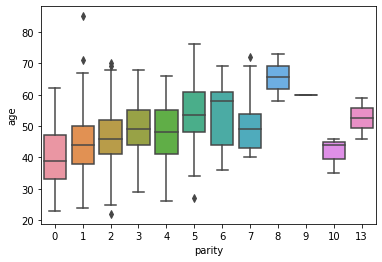

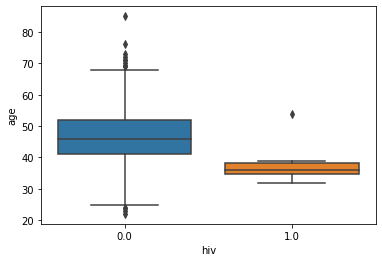

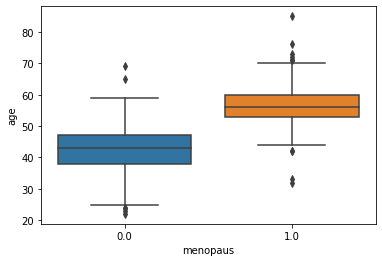

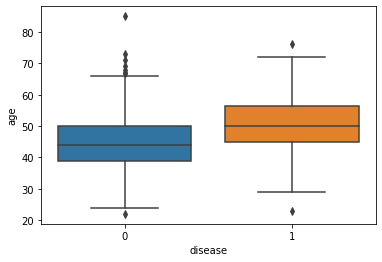

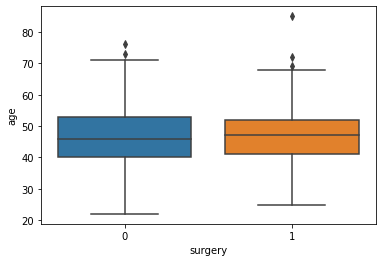

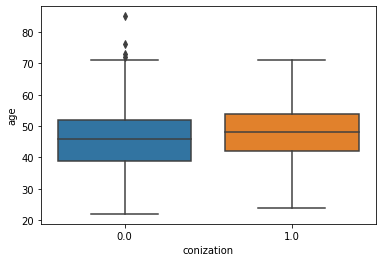

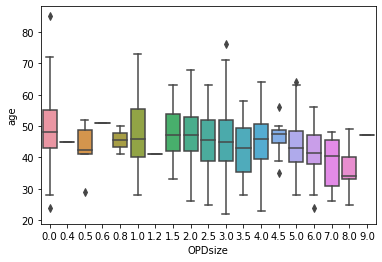

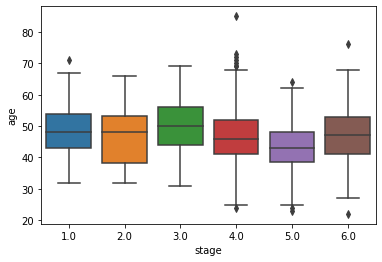

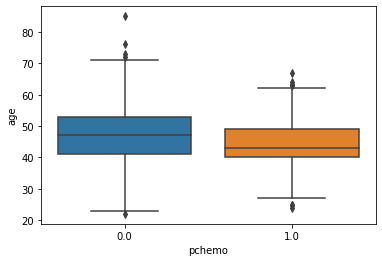

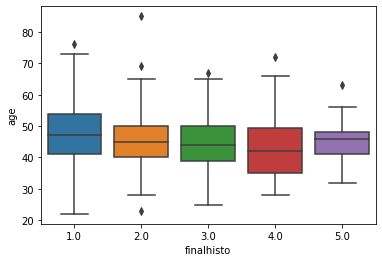

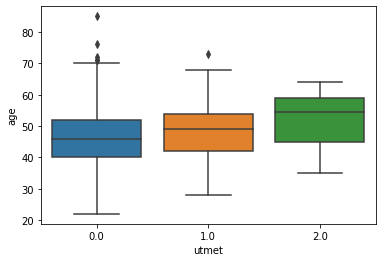

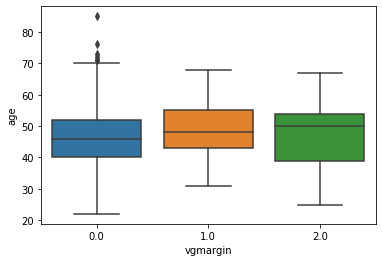

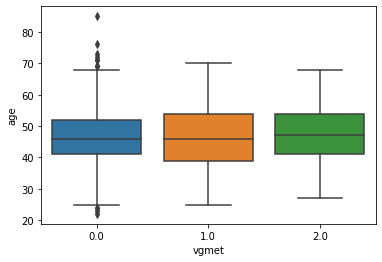

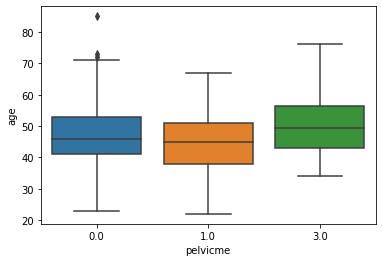

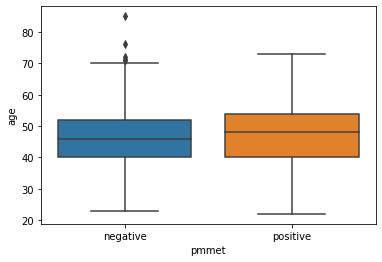

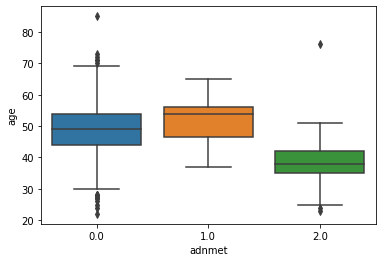

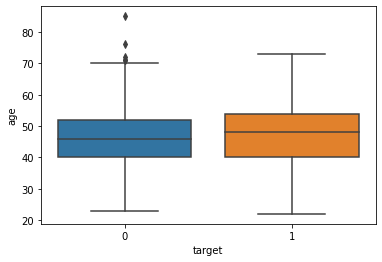

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
categorical=list(df_clean.columns)
categorical.remove('age')
categorical.remove('nodeyiel')
for i in categorical:
    plt.figure()
    sns.boxplot(x=i,y="age",data=df_clean)

#### Check Missing Data of Everything

<AxesSubplot:xlabel='hn'>

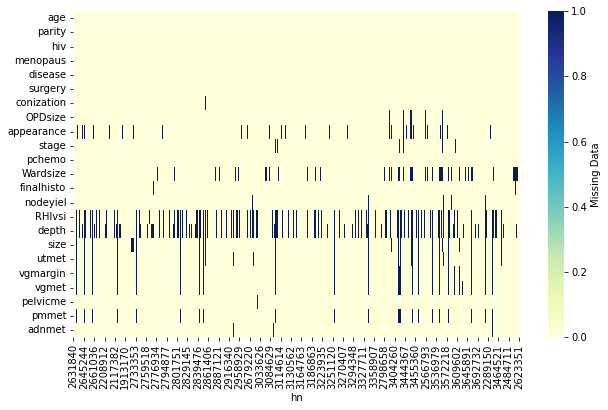

In [52]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            yticklabels=True,
            cbar_kws={'label': 'Missing Data'})

#### Check Relation of Everything

<AxesSubplot:>

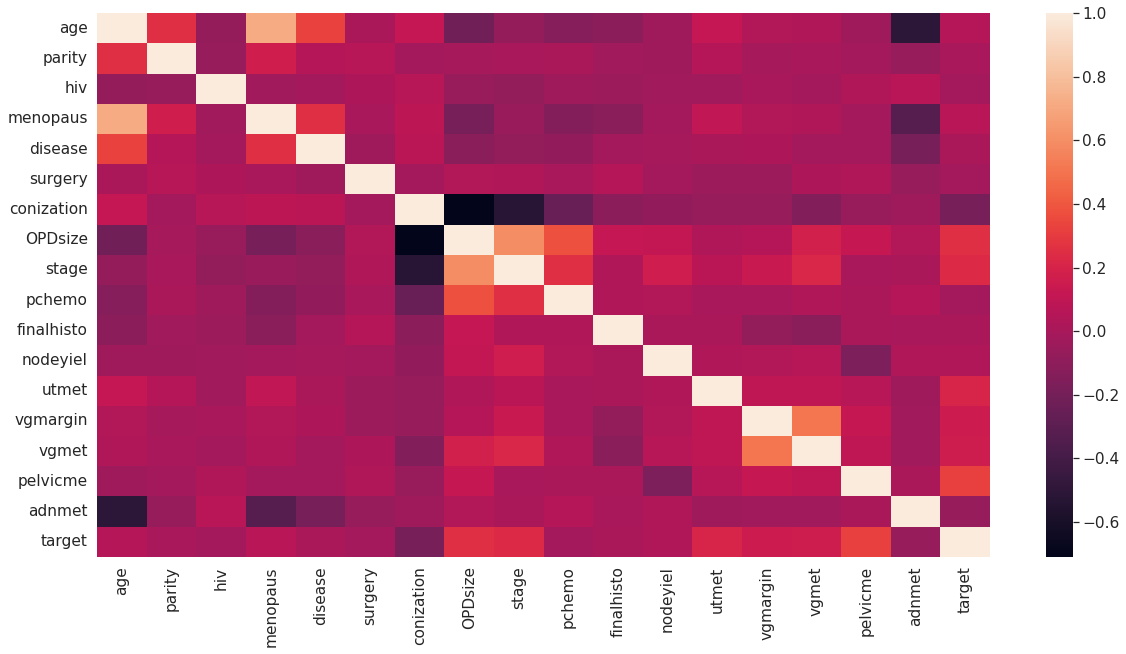

In [53]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(df_clean.corr())

### 15. Linear Regression

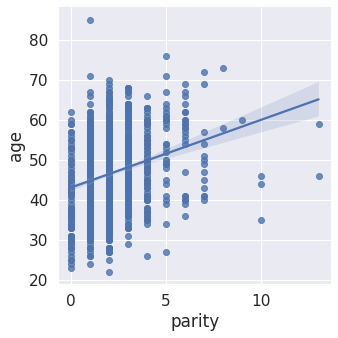

In [54]:
import seaborn as sns
sns.lmplot(x='parity',y='age',data=df_clean,fit_reg=True) 

In [55]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X = df['parity'].values.reshape(-1,1)
y = df['age'].values.reshape(-1,1)
regr.fit(X, y)
print("y = "+str(regr.intercept_)+ " + "+str(regr.coef_[0])+"X")

y = [42.76048226] + [1.8231776]X


### 16. One-Way Anova 

In [56]:
import scipy.stats as stats
group1 = df_clean['age'][df_clean['target'] == 1]
group2 = df_clean['age'][df_clean['target'] == 0]
_, lpValue = stats.levene(group1, group2)
fValue, pValue = stats.f_oneway(group1, group2)
print("Levene Test : "+str(lpValue))
print("Anova Test: F = "+ str(fValue) + ", p =" + str(pValue))

Levene Test : 0.0012434979050465194
Anova Test: F = 3.198303107301872, p =0.07390909328177112


### 17. Clustering

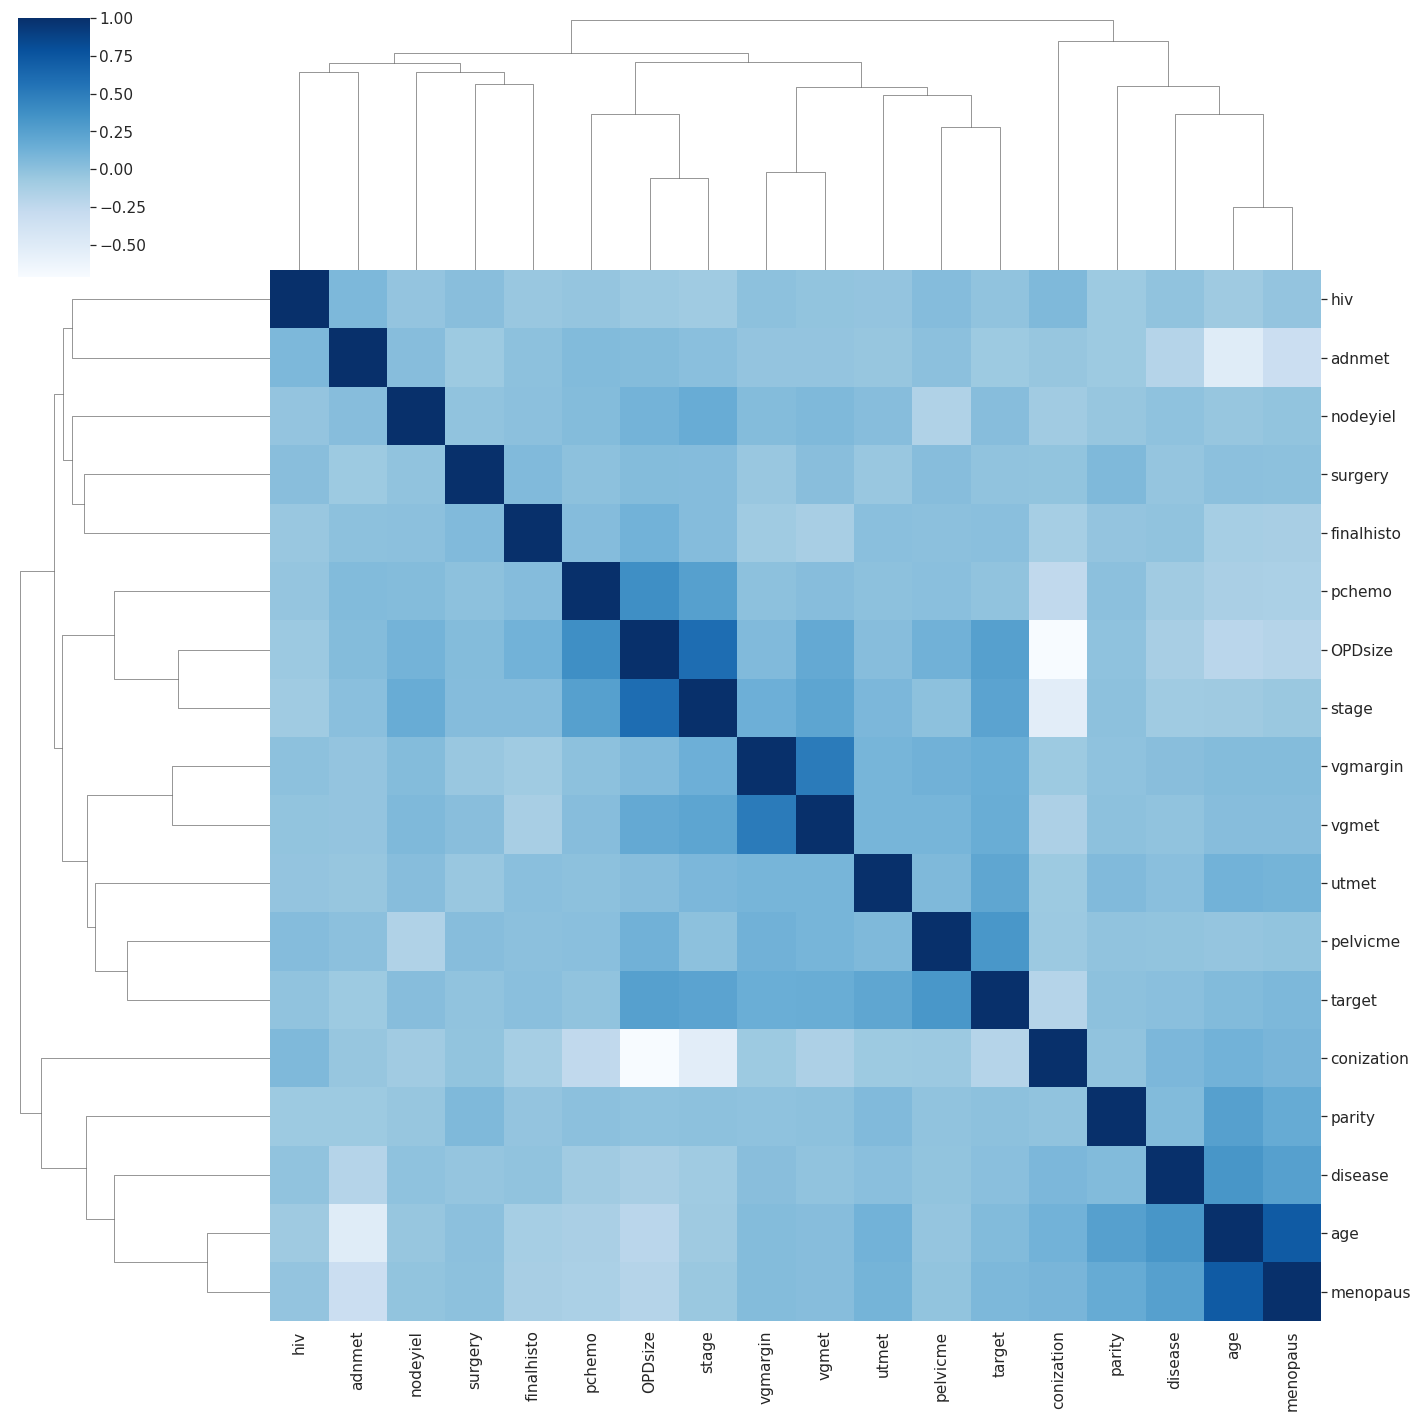

In [57]:
sns.set(font_scale=1.4)
sns.clustermap(data=df_clean.corr(), cmap="Blues", figsize=(20,20), yticklabels=True)

/opt/conda/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


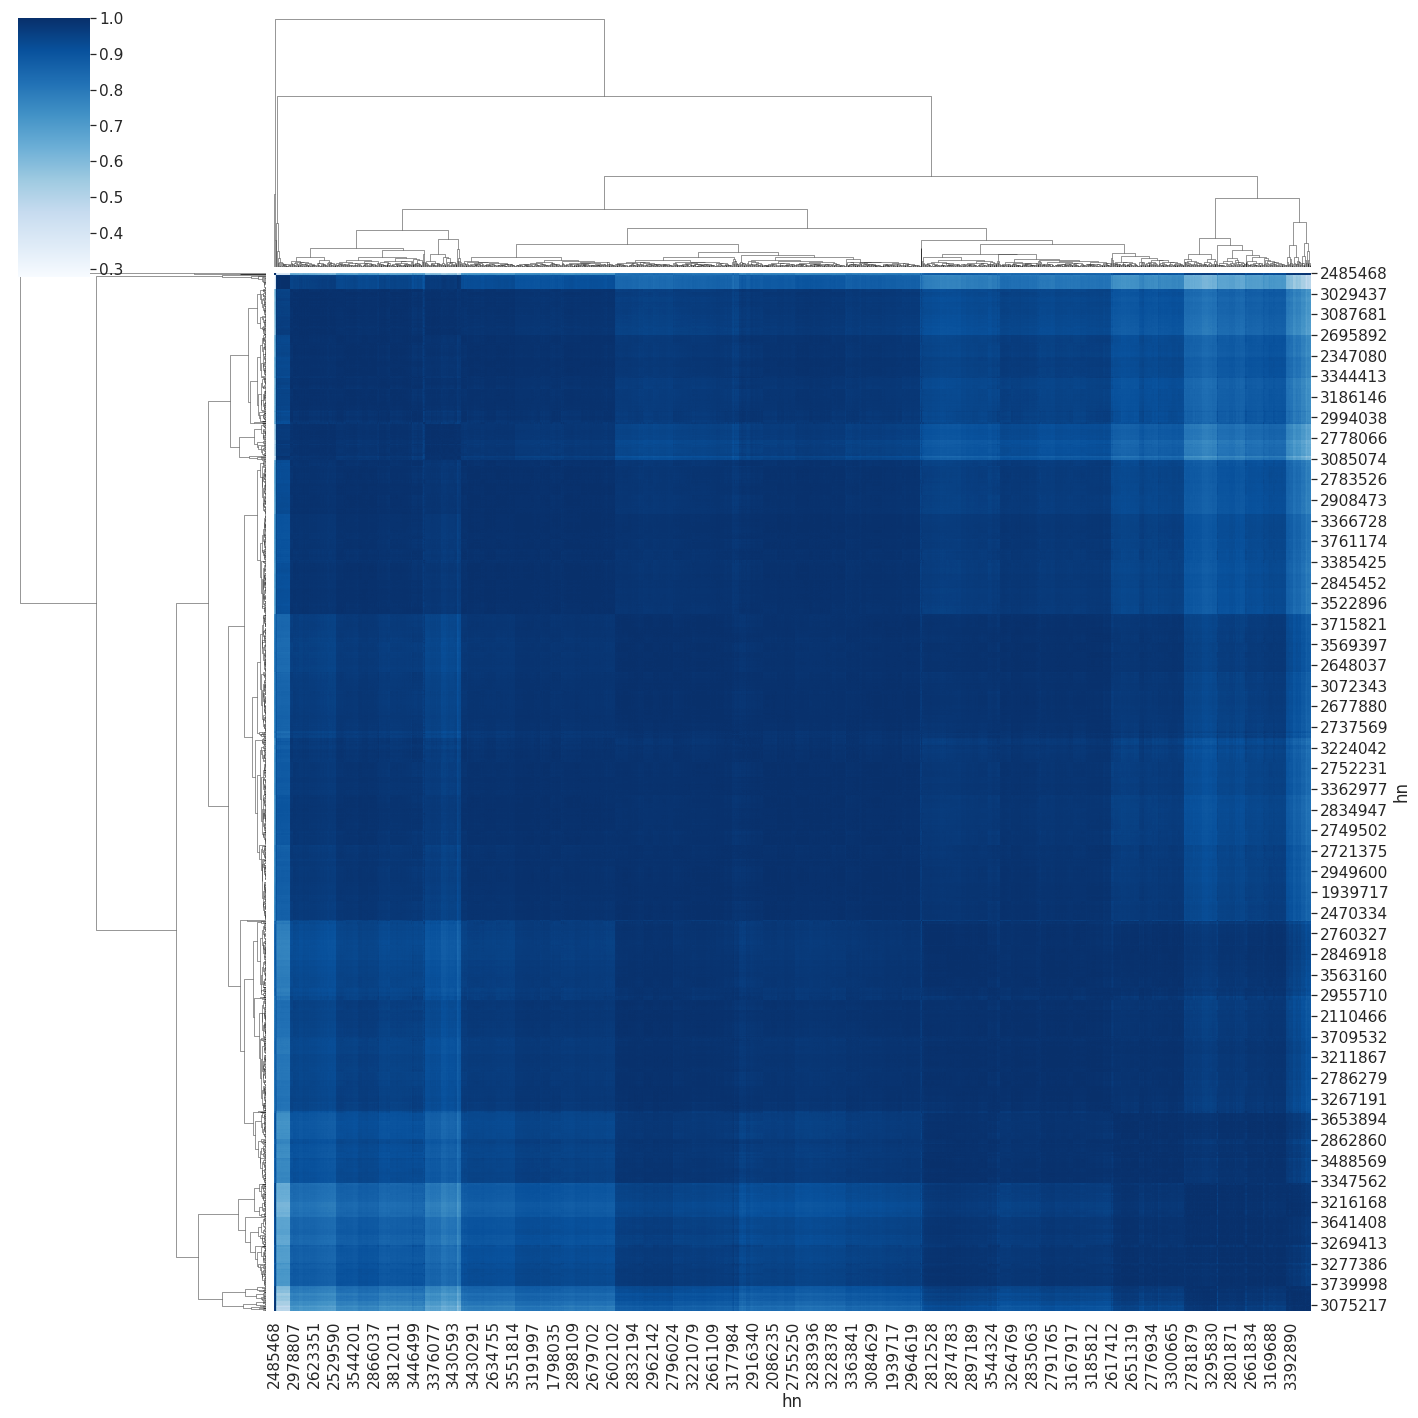

In [58]:
sns.set(font_scale=1.4)
sns.clustermap(data=df_clean.drop('pmmet',axis=1).transpose().corr(), cmap="Blues", figsize=(20,20))

In [59]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering(n_clusters=3).fit(df_clean.drop('pmmet',axis=1))
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0])

<BarContainer object of 3 artists>

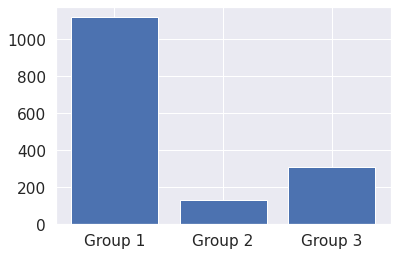

In [60]:
result = [sum(clustering.labels_==i) for i in range(3)]
plt.bar(['Group 1','Group 2','Group 3'],result)

#### More detail on Clustering 
https://scikit-learn.org/stable/modules/clustering.html

### Numpy vs Pandas in my opinion
1. Numpy for general use / Pandas for data prepocessing and exploration and analysis (EDA)
2. Numpy = Array User /  Pandas = Pivot User

## General Data Pre-Processing
Make data in a ready format for report
<img src=https://cdn.ttgtmedia.com/rms/onlineimages/steps_for_data_preprocessing-f.png>
#### 1. Data Profilling : Exploration of Data
#### 2. Data Cleansing : Remove Missing Data, Bad Data, Junk Data
#### 3. Data Reduction : Check Redundant Data, No Meaning Data
#### 4. Data Transformation : Standardize Data, Make Data in correct format to use
#### 5. Data Enrichment : Generate more useful data or Add more useful data

### Case Study : 

### 1. Data Profilling 

In [61]:
df = pd.read_csv('../input/all-crypto-currencies/crypto-markets.csv')

In [62]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [63]:
df.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,942297.000000,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,942297.000000,9.422970e+05
mean,1000.170608,3.483522e+02,4.085930e+02,2.962526e+02,3.461018e+02,8.720383e+06,1.725060e+08,0.459499,1.123400e+02
std,587.575283,1.318436e+04,1.616386e+04,1.092931e+04,1.309822e+04,1.839802e+08,3.575590e+09,0.326160,6.783713e+03
min,1.000000,2.500000e-09,3.200000e-09,2.500000e-10,2.000000e-10,0.000000e+00,0.000000e+00,-1.000000,0.000000e+00
25%,465.000000,2.321000e-03,2.628000e-03,2.044000e-03,2.314000e-03,1.750000e+02,2.958100e+04,0.162900,0.000000e+00
50%,1072.000000,2.398300e-02,2.680200e-02,2.143700e-02,2.389200e-02,4.278000e+03,5.227960e+05,0.432400,0.000000e+00
75%,1484.000000,2.268600e-01,2.508940e-01,2.043910e-01,2.259340e-01,1.190900e+05,6.874647e+06,0.745800,3.000000e-02
max,2072.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.265025e+11,1.000000,1.770563e+06


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   slug         942297 non-null  object 
 1   symbol       942297 non-null  object 
 2   name         942297 non-null  object 
 3   date         942297 non-null  object 
 4   ranknow      942297 non-null  int64  
 5   open         942297 non-null  float64
 6   high         942297 non-null  float64
 7   low          942297 non-null  float64
 8   close        942297 non-null  float64
 9   volume       942297 non-null  float64
 10  market       942297 non-null  float64
 11  close_ratio  942297 non-null  float64
 12  spread       942297 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 93.5+ MB


### 2. Data Cleansing 

### 3. Data Reduction

In [65]:
check = df.duplicated(keep='first')

In [66]:
sum(check)

0

### 4. Data Transformation 

In [67]:
df_clean = df
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['market_billion'] = df_clean['market'] / 1000000000
df_clean['volume_million'] = df_clean['volume'] / 1000000000
df_clean['volume_billion'] = df_clean['volume']

In [68]:
df_clean.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread,market_billion,volume_million,volume_billion
count,942297.000000,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,942297.000000,9.422970e+05,942297.000000,9.422970e+05,9.422970e+05
mean,1000.170608,3.483522e+02,4.085930e+02,2.962526e+02,3.461018e+02,8.720383e+06,1.725060e+08,0.459499,1.123400e+02,0.172506,8.720383e-03,8.720383e+06
std,587.575283,1.318436e+04,1.616386e+04,1.092931e+04,1.309822e+04,1.839802e+08,3.575590e+09,0.326160,6.783713e+03,3.575590,1.839802e-01,1.839802e+08
min,1.000000,2.500000e-09,3.200000e-09,2.500000e-10,2.000000e-10,0.000000e+00,0.000000e+00,-1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,465.000000,2.321000e-03,2.628000e-03,2.044000e-03,2.314000e-03,1.750000e+02,2.958100e+04,0.162900,0.000000e+00,0.000030,1.750000e-07,1.750000e+02
50%,1072.000000,2.398300e-02,2.680200e-02,2.143700e-02,2.389200e-02,4.278000e+03,5.227960e+05,0.432400,0.000000e+00,0.000523,4.278000e-06,4.278000e+03
75%,1484.000000,2.268600e-01,2.508940e-01,2.043910e-01,2.259340e-01,1.190900e+05,6.874647e+06,0.745800,3.000000e-02,0.006875,1.190900e-04,1.190900e+05
max,2072.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.265025e+11,1.000000,1.770563e+06,326.502486,2.384090e+01,2.384090e+10


### 5. Data Enrichment

In [69]:
df_clean.groupby(['date','name'])['close'].mean().unstack()

name,0chain,0x,0xBitcoin,0xcert,1World,2GIVE,300 Token,42-coin,4NEW,808Coin,...,imbrex,indaHash,nDEX,nUSD,savedroid,smARTOFGIVING,ugChain,vSlice,vSportCoin,wys Token
date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-26,0.094182,0.347974,0.321285,0.001996,0.085203,0.001617,175.98,23575.30,0.023521,2.400000e-07,...,0.047550,0.003004,0.000010,0.967816,0.000365,0.062159,0.002505,0.002036,0.001411,0.004873
2018-11-27,0.094085,0.357042,0.366923,0.001905,0.075873,0.001563,133.68,25086.00,0.020391,2.500000e-07,...,0.049915,0.003150,0.000010,0.994856,0.000371,0.070546,0.002612,0.002028,0.001408,0.004697
2018-11-28,0.106128,0.435269,0.418035,0.002013,0.084989,0.001903,148.18,25512.10,0.019501,2.300000e-07,...,0.051809,0.003925,0.000014,0.996896,0.000424,0.078514,0.002917,0.002466,0.001391,0.005635


In [70]:
close_price = df_clean.groupby(['date','name'])['close'].mean().unstack()

### EDA

In [71]:
top10 = df.groupby(['name'])['market_billion'].last().sort_values(ascending=False).head(10).sort_values()
top10

name
Cardano          1.085456
Bitcoin SV       1.714035
Tether           1.851553
Litecoin         2.006242
EOS              2.738537
Stellar          3.162026
Bitcoin Cash     3.164359
Ethereum        12.166286
XRP             15.306739
Bitcoin         74.451017
Name: market_billion, dtype: float64

<BarContainer object of 10 artists>

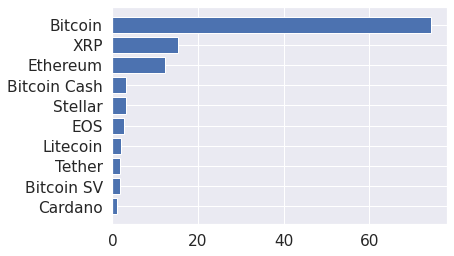

In [72]:
plt.barh(top10.index, top10)

<AxesSubplot:ylabel='name'>

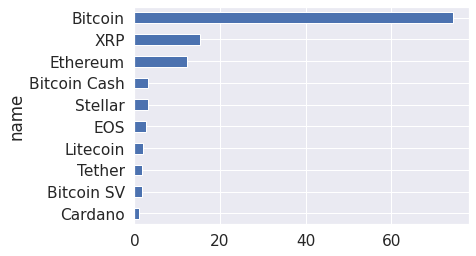

In [73]:
top10.plot(kind='barh')

In [74]:
top10 = df.groupby(['name'])['volume_billion'].max().sort_values(ascending=False).head(10).sort_values()
top10

name
IOTA            2.126970e+09
Qtum            2.427870e+09
TRON            4.089410e+09
EOS             4.870720e+09
Tether          6.247250e+09
Litecoin        6.961680e+09
XRP             9.110440e+09
Ethereum        9.214950e+09
Bitcoin Cash    1.188960e+10
Bitcoin         2.384090e+10
Name: volume_billion, dtype: float64

<AxesSubplot:ylabel='volume_billion'>

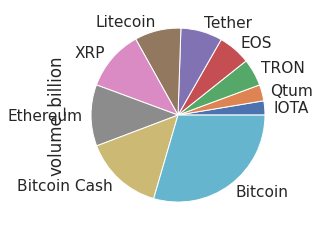

In [75]:
top10.plot(kind='pie')

In [76]:
top5 = df.groupby(['name'])['market'].last().sort_values(ascending=False).head(5).index
top5

Index(['Bitcoin', 'XRP', 'Ethereum', 'Bitcoin Cash', 'Stellar'], dtype='object', name='name')

In [77]:
 best3 = pd.concat( [df[df['name'] == 'Bitcoin'], df[df['name'] == 'XRP'], df[df['name'] == 'Ethereum']] ) 

In [78]:
best3

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,market_billion,volume_million,volume_billion
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09,0.5438,3.88,1.488567,0.000000,0.000000e+00
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,0.7813,13.49,1.603769,0.000000,0.000000e+00
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,0.3843,12.88,1.542813,0.000000,0.000000e+00
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,0.2882,32.17,1.298955,0.000000,0.000000e+00
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,0.3881,33.32,1.168517,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,ethereum,ETH,Ethereum,2018-11-25,3,113.13,118.88,101.77,116.45,2.466750e+09,1.204390e+10,0.8580,17.11,12.043901,2.466750,2.466750e+09
5193,ethereum,ETH,Ethereum,2018-11-26,3,116.34,118.20,104.89,108.33,2.139490e+09,1.120678e+10,0.2585,13.31,11.206775,2.139490,2.139490e+09
5194,ethereum,ETH,Ethereum,2018-11-27,3,107.91,111.84,102.45,110.01,2.320010e+09,1.138222e+10,0.8051,9.39,11.382217,2.320010,2.320010e+09
5195,ethereum,ETH,Ethereum,2018-11-28,3,110.20,126.05,110.20,122.44,2.673470e+09,1.267049e+10,0.7722,15.85,12.670491,2.673470,2.673470e+09


In [79]:
best3.groupby(['date','name'])['close'].mean().unstack()

name,Bitcoin,Ethereum,XRP
date,,,
2013-04-28,134.21,NaN,NaN
2013-04-29,144.54,NaN,NaN
2013-04-30,139.00,NaN,NaN
2013-05-01,116.99,NaN,NaN
2013-05-02,105.21,NaN,NaN
...,...,...,...
2018-11-25,4009.97,116.45,0.374551
2018-11-26,3779.13,108.33,0.355451
2018-11-27,3820.72,110.01,0.360163


<AxesSubplot:xlabel='date'>

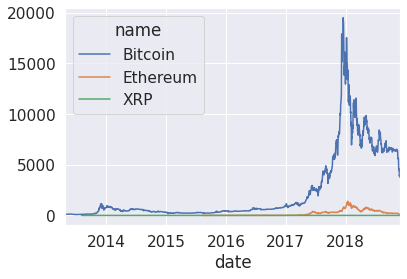

In [80]:
best3.groupby(['date','name'])['close'].mean().unstack().plot()

In [81]:
best3['date'].dt.year

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
5192    2018
5193    2018
5194    2018
5195    2018
5196    2018
Name: date, Length: 5197, dtype: int64

<AxesSubplot:xlabel='date'>

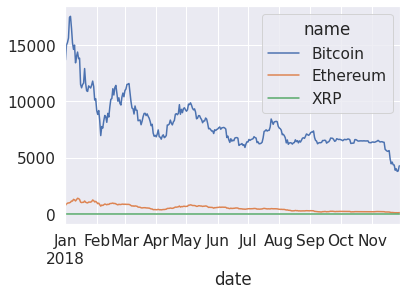

In [82]:
best3[best3['date'].dt.year == 2018].groupby(['date','name'])['close'].mean().unstack().plot()

### Correlation

In [83]:
close_price

name,0chain,0x,0xBitcoin,0xcert,1World,2GIVE,300 Token,42-coin,4NEW,808Coin,...,imbrex,indaHash,nDEX,nUSD,savedroid,smARTOFGIVING,ugChain,vSlice,vSportCoin,wys Token
date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-26,0.094182,0.347974,0.321285,0.001996,0.085203,0.001617,175.98,23575.30,0.023521,2.400000e-07,...,0.047550,0.003004,0.000010,0.967816,0.000365,0.062159,0.002505,0.002036,0.001411,0.004873
2018-11-27,0.094085,0.357042,0.366923,0.001905,0.075873,0.001563,133.68,25086.00,0.020391,2.500000e-07,...,0.049915,0.003150,0.000010,0.994856,0.000371,0.070546,0.002612,0.002028,0.001408,0.004697
2018-11-28,0.106128,0.435269,0.418035,0.002013,0.084989,0.001903,148.18,25512.10,0.019501,2.300000e-07,...,0.051809,0.003925,0.000014,0.996896,0.000424,0.078514,0.002917,0.002466,0.001391,0.005635


In [84]:
best3['name'].unique()

array(['Bitcoin', 'XRP', 'Ethereum'], dtype=object)

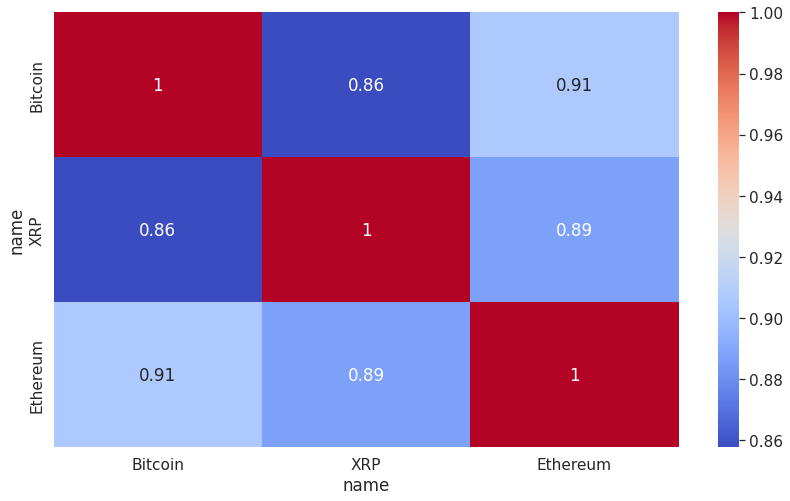

In [85]:
plt.figure(figsize=(14,8))
sns.heatmap(close_price[best3['name'].unique()].corr(), cmap='coolwarm', annot=True);

### Anova

In [86]:
best3['name'].unique()[0]

'Bitcoin'

In [87]:
import scipy.stats as stats
group1 = close_price[best3['name'].unique()[0]]
group2 = close_price[best3['name'].unique()[1]]
group3 = close_price[best3['name'].unique()[2]]
_, lpValue = stats.levene(group1, group2, group3)
fValue, pValue = stats.f_oneway(group1, group2, group3)
print("Levene Test : "+str(lpValue))
print("Anova Test: F = "+ str(fValue) + ", p =" + str(pValue))

Levene Test : nan
Anova Test: F = nan, p =nan


In [88]:
group1.values

array([ 134.21,  144.54,  139.  , ..., 4257.42, 4278.85,     nan])

In [89]:
group1.dropna()

date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2018-11-25    4009.97
2018-11-26    3779.13
2018-11-27    3820.72
2018-11-28    4257.42
2018-11-29    4278.85
Name: Bitcoin, Length: 2042, dtype: float64

In [90]:
import scipy.stats as stats
group1 = group1.dropna()
group2 = group2.dropna()
group3 = group3.dropna()
_, lpValue = stats.levene(group1, group2, group3)
fValue, pValue = stats.f_oneway(group1, group2, group3)
print("Levene Test : "+str(lpValue))
print("Anova Test: F = "+ str(fValue) + ", p =" + str(pValue))

Levene Test : 6.988099926138146e-206
Anova Test: F = 649.9932290757474, p =1.1654711961311488e-252


# Data Prediction

In [91]:
df = pd.read_csv('/kaggle/input/titanic/titanic.txt', sep='\t', header = 0)
df

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5000,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1305,Third,"Zabour, Miss. Thamine",Female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5000,0,0,2656,7.2250,NaN,Cherbourg,NaN,No
1307,Third,"Zakarian, Mr. Ortin",Male,27.0000,0,0,2670,7.2250,NaN,Cherbourg,NaN,No


In [92]:
df_clean = df
df_clean = df_clean.drop(['Cabin', 'Name', 'Ticket Number', 'Port of Embarkation', 'Life Boat'] ,axis=1)
df_clean.columns

Index(['Passenger Class', 'Sex', 'Age', 'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Passenger Fare', 'Survived'],
      dtype='object')

In [93]:
df_clean = df_clean.dropna()

In [94]:
df_clean.columns

Index(['Passenger Class', 'Sex', 'Age', 'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Passenger Fare', 'Survived'],
      dtype='object')

In [95]:
df_clean['Passenger Class'] = pd.factorize(df_clean['Passenger Class'])[0]
df_clean['Sex'] = pd.factorize(df_clean['Sex'])[0]
val, label = pd.factorize(df_clean['Survived'])
df_clean['Survived'] = val 

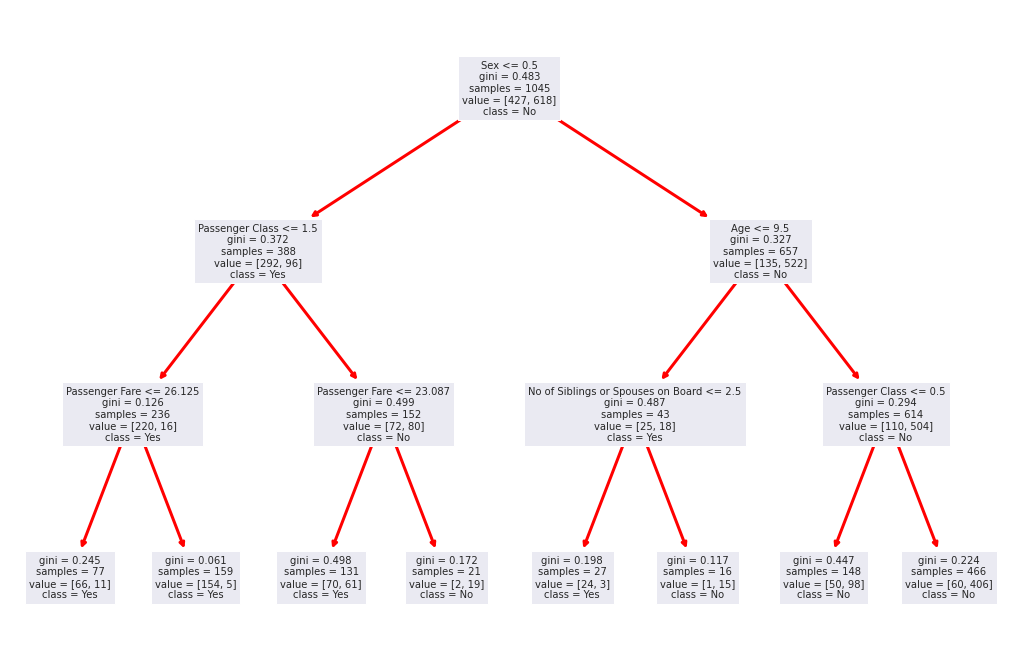

In [96]:
from sklearn import tree
X = df_clean.drop('Survived', axis=1) 
y = df_clean['Survived']
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, y)

# plot tree
plt.figure(figsize=(18,12))  # set plot size (denoted in inches)
out = tree.plot_tree(clf, fontsize=10, feature_names=X.columns, class_names = label)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)
plt.show()